In [17]:
import numpy as np
import pandas as pd

# 공식 가이드
# https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

# DataFrame #1

- 기본 판다스 데이터 구조로 2차원 표 형식 데이터

- 데이터 구조에는 레이블이 지정된 축(행과 열)을 포함하고 시리즈 객체를 값으로 가지는 딕셔너리와 유사한 컨테이너


## 다양한 생성 방법

### 리스트를 값으로 가지는 사전으로 생성

- 사전의 값으로 리스트를 가지는 사전으로 부터 생성

- 사전의 키가 컬럼명이 되고 값이 컬럼이 됨

In [18]:
data = {'population':[9741383, 3416918, 2453041, 2925967],
        'area':[605.2, 770.0, 886.6, 1063.0]}

df = pd.DataFrame(data, index=['seoul', 'busan', 'daegu', 'inchon'])
df

,population,area
seoul,9741383,605.2
busan,3416918,770.0
daegu,2453041,886.6
inchon,2925967,1063.0


### 시리즈를 값으로 가지는 사전으로 생성

In [19]:
population_dict = {'seoul':9741383, 'busan':3416918,
                   'daegu':2453041, 'inchon':2925967}
pop = pd.Series(population_dict).sort_index()

area_dict = {'seoul':605.2, 'busan':770.0,
             'daegu':886.6, 'inchon':1063.0}
area = pd.Series(area_dict).sort_index()


# 열 Series를 가지는 사전을 DataFrame으로 만들기
pd.DataFrame({'population':pop, 'area':area})

,population,area
busan,3416918,770.0
daegu,2453041,886.6
inchon,2925967,1063.0
seoul,9741383,605.2


### 2차원 리스트로 생성

In [20]:
df = pd.DataFrame(
    [
        [9741383, 	605.2],
        [3416918, 	770.0],
        [2453041, 	886.6],
        [2925967, 	1063.0]
    ],
    columns=['population', 'area'],
    index=['seoul', 'busan', 'daegu', 'inchon']
)

df

,population,area
seoul,9741383,605.2
busan,3416918,770.0
daegu,2453041,886.6
inchon,2925967,1063.0


### 시리즈를 원소로 가지는 리스트로 생성

In [21]:
series_seoul = pd.Series([9741383, 605.2], index=['population', 'area'])
series_busan = pd.Series([3416918, 770.0], index=['population', 'area'])
series_daegu = pd.Series([2453041, 886.6], index=['population', 'area'])
series_inchon = pd.Series([2925967, 1063.0], index=['population', 'area'])
print(series_seoul)

df = pd.DataFrame(
    [series_seoul, series_busan, series_daegu, series_inchon],
    index=['seoul', 'busan', 'daegu', 'inchon']
)
df

population    9741383.0
area              605.2
dtype: float64


,population,area
seoul,9741383.0,605.2
busan,3416918.0,770.0
daegu,2453041.0,886.6
inchon,2925967.0,1063.0


### 연습

- 세명에 대한 키와 몸무게가 다음처럼 조사되어었다.
    - 철수 키:178cm, 몸무게:80kg
    - 영희 키:165cm, 몸무게:53kg
    - 철호 키:172cm, 몸무게:72kg

1. 위 데이터를 사전을 사용한 방식으로 데이터프레임화 하시오. 행 인덱스에는 사람 이름, 열 인덱스(컬럼 이름)에는 키, 몸무게가 배치되게 하시오.

2. 위 데이터를 2차원 리스트를  사용한 방식으로 데이터프레임화 하시오. 행 인덱스에는 사람 이름, 열 인덱스(컬럼 이름)에는 키, 몸무게가 배치되게 하시오.


In [22]:
# 1
data = {
    '철수':[178, 80],
    '영희':[165, 53],
    '철호':[172, 72]
}
data = {
    '키': [178, 165, 172],
    '몸무게': [80, 53, 72]
}

df = pd.DataFrame(data, index=['철수', '영희', '철호'])
df


,키,몸무게
철수,178,80
영희,165,53
철호,172,72


In [23]:
# 2
data = [
    [178, 80],
    [165, 53],
    [172, 72]
]

df = pd.DataFrame(
    data,
    columns=['키', '몸무게'],
    index=['철수', '영희', '철호']
)

df

,키,몸무게
철수,178,80
영희,165,53
철호,172,72


### CSV에서 만들기

- csv파일: ','또는 다른 구분자로 구분된 값들이 한줄 단위로 적혀있는 데이터 파일

- read_csv() 함수로 로딩
    - sep: 구분자 지정
    - header: 제목줄 지정, 행번호 또는 None면 무시
    - index_col: 인덱스로 쓸 열 지정
    - usecols: 사용할 열을 직접 지정

In [24]:
%cd content

[WinError 2] 지정된 파일을 찾을 수 없습니다: 'content'
C:\Users\imeun\aice\aice


C:\Users\imeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [25]:
!pwd

/c/Users/imeun/aice/aice


In [26]:
# 기본 읽기
df = pd.read_csv('data.csv', sep=',')
df

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
# sep지정, :
import pandas as pd
df = pd.read_csv('data/data_colon.csv', sep=':')
df

In [27]:
# header 무시, 열이름 직접 이름 지정
pd.read_csv("data_noheader.csv", header=None, names=['city', 'pop', 'area'])


FileNotFoundError: [Errno 2] No such file or directory: 'data_noheader.csv'

In [28]:
# index_col 지정
df_city = pd.read_csv('data.csv', index_col='city')
df_city.index.name = None
df_city

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
# usecols 지정
df = pd.read_csv('data.csv', usecols=['city', 'area'])
df

In [ ]:
# json
df = pd.read_json('data.json')
df

### 연습

1. 현재 폴더를 확인하기
2. 현재 폴더에 `data` 폴더를 만들고 `data` 폴더에 `pulse_rate.csv`를 위치 시키기
3. `read_csv()`를 사용해 해당파일을 아래 모양처럼 데이터프레임으로 읽기

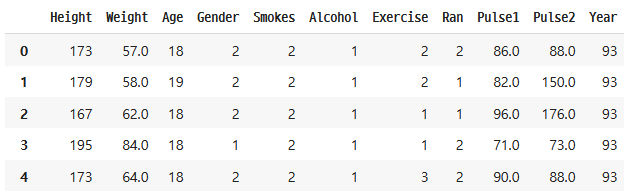

In [29]:
# 1. 현재 폴더를 확인하기

!pwd

/c/Users/imeun/aice/aice


In [30]:
# 2. 현재 폴더에 `data` 폴더를 만들고 `data` 폴더에 `pulse_rate.csv`를 위치 시키기


In [31]:
# 3. `read_csv()`를 사용해 해당파일을 아래 모양처럼 데이터프레임으로 읽기

df = pd.read_csv("./data/pulse_rate.csv", index_col='Unnamed: 0')
df


,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year
0,173,57.0,18,2,2,1,2,2,86.0,88.0,93
1,179,58.0,19,2,2,1,2,1,82.0,150.0,93
2,167,62.0,18,2,2,1,1,1,96.0,176.0,93
3,195,84.0,18,1,2,1,1,2,71.0,73.0,93
4,173,64.0,18,2,2,1,3,2,90.0,88.0,93
...,...,...,...,...,...,...,...,...,...,...,...
105,93,27.0,19,2,2,2,3,2,119.0,120.0,98
106,161,43.0,19,2,2,2,3,2,90.0,89.0,98
107,182,60.0,22,1,2,1,3,2,86.0,84.0,98
108,170,65.0,18,1,2,1,1,2,69.0,64.0,98


## 데이터 살펴보기

- 행은 개별 데이터를 나타내고 `데이터`, `샘플`, `관측치` 등의 용어를 사용

- 열은 개별 데이터거 가지는 특징으로 `컬럼`, `열`, `변수`라는 용어 사용

In [32]:
# insurance.csv 파일 읽기



In [33]:
# head: 앞 몇개 데이터 확인



In [34]:
# tail: 뒤에서 몇개 데이터 확인



In [35]:
# shape, X:(N,D) N:데이터 개수, D:데이터의 특성개수 또는 데이터의 차원



In [36]:
# len, shape[0]



In [37]:
# index(행 인덱스) 확인



In [38]:
# 열 이름 (변수 이름) 확인



In [39]:
# 변수 타입 확인



In [40]:
# 변수 값 카운팅



In [41]:
# 변수 범주 확인



In [42]:
# 유일 범주 개수 확인



## 한글 인코딩

In [43]:
import pandas as pd
# 인코딩(글자 저장 방법) 오류 발생
# UnicodeDecodeError  'utf-8' codec can't decode byte 0xbc in position 1: invalid start byte
try:
    pd.read_csv('data/고용지표_20221115084415.csv',encoding = 'cp949', index_col=0, header=0)
except Exception as e:
    print(e)

- 한글이라고 cp949를 지정하는게 아님, utf-8로 저장된 한글 파일은 옵션 없이 잘 읽혀짐

In [44]:
# 도로교통공단_사망 교통사고 정보_20211231_utf8.csv 파일을 옵션없이 읽어보기



## 날짜형 변수

In [45]:
# 스타벅스 주가 데이터 읽기 starbucks.csv
df = pd.read_csv("data/starbucks.csv")
print(df.head())

         Date    Close    Volume
0  2015-01-02  38.0061   6906098
1  2015-01-05  37.2781  11623796
2  2015-01-06  36.9748   7664340
3  2015-01-07  37.8848   9732554
4  2015-01-08  38.4961  13170548


In [46]:
# 인덱스의 형식 확인하기
print(type(df.index))


<class 'pandas.core.indexes.range.RangeIndex'>


In [47]:
df.dtypes

Date       object
Close     float64
Volume      int64
dtype: object

In [48]:
# 날짜 형식으로 인덱스를 읽어들이기
df = pd.read_csv('data/starbucks.csv',index_col='Date',parse_dates=True)

In [49]:
# 인덱스 다시 확인
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


## 이어붙이기: `concat`

In [50]:
# nba1.csv 읽기

df1 = pd.read_csv("data/nba1.csv")
df1

,Name,Team,Position,Birthday,Salary
0,Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697
1,Christian Wood,Detroit Pistons,PF,9/27/95,1645357
2,PJ Washington,Charlotte Hornets,PF,8/23/98,3831840
3,Derrick Rose,Detroit Pistons,PG,10/4/88,7317074
4,Marial Shayok,Philadelphia 76ers,G,7/26/95,79568
...,...,...,...,...,...
220,Tony Bradley,Utah Jazz,C,1/8/98,1962360
221,Oshae Brissett,Toronto Raptors,SF,6/20/98,79568
222,Gary Clark,Houston Rockets,PF,11/16/94,1416852
223,Pascal Siakam,Toronto Raptors,PF,4/2/94,2351838


In [51]:
# nba2.csv 읽기

df2 = pd.read_csv("data/nba2.csv")
df2.head(5)

,Name,Team,Position,Birthday,Salary
0,Tomas Satoransky,Chicago Bulls,PG,10/30/91,10000000
1,Davis Bertans,Washington Wizards,PF,11/12/92,7000000
2,Amir Coffey,Los Angeles Clippers,G,6/17/97,79568
3,Ignas Brazdeikis,New York Knicks,SF,1/8/99,898310
4,Ivan Rabb,New York Knicks,PF,2/4/97,79568


In [52]:
# concat으로 두 데이터프레임을 이어 붙이기
df_concat= pd.concat([df1,df2])
df_concat.head(5)

,Name,Team,Position,Birthday,Salary
0,Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697
1,Christian Wood,Detroit Pistons,PF,9/27/95,1645357
2,PJ Washington,Charlotte Hornets,PF,8/23/98,3831840
3,Derrick Rose,Detroit Pistons,PG,10/4/88,7317074
4,Marial Shayok,Philadelphia 76ers,G,7/26/95,79568


In [53]:
# head, tail

df_concat.head(10)

,Name,Team,Position,Birthday,Salary
0,Shake Milton,Philadelphia 76ers,SG,9/26/96,1445697
1,Christian Wood,Detroit Pistons,PF,9/27/95,1645357
2,PJ Washington,Charlotte Hornets,PF,8/23/98,3831840
3,Derrick Rose,Detroit Pistons,PG,10/4/88,7317074
4,Marial Shayok,Philadelphia 76ers,G,7/26/95,79568
5,Draymond Green,Golden State Warriors,PF,3/4/90,18539130
6,Kendrick Nunn,Miami Heat,SG,8/3/95,1416852
7,Cedi Osman,Cleveland Cavaliers,SF,4/8/95,2907143
8,Brook Lopez,Milwaukee Bucks,C,4/1/88,12093024
9,Torrey Craig,Denver Nuggets,SF,12/19/90,2000000


In [54]:
df_concat.tail()

,Name,Team,Position,Birthday,Salary
220,Austin Rivers,Houston Rockets,PG,8/1/92,2174310
221,Harry Giles,Sacramento Kings,PF,4/22/98,2578800
222,Robin Lopez,Milwaukee Bucks,C,4/1/88,4767000
223,Collin Sexton,Cleveland Cavaliers,PG,1/4/99,4764960
224,Ricky Rubio,Phoenix Suns,PG,10/21/90,16200000


In [55]:
# 0번 인덱스가 2개 있음



## 인덱스: `set_index`,  `reset_index`

- 위에서 `concat`시킨 데이터프레임은 인덱스가 겹쳐져 있음

- 인덱스 번호를 다시 붙이기 위해 `reset_index`사용

In [56]:
# reset_index 후 tail로 인덱스 번호 확인



In [57]:
# 기존 인덱스 drop



In [58]:
# 인덱스 리셋 확인



In [59]:
# 이름을 인덱스로 설정



### 연습

1. `data` 폴더에 `대구_2호선_열차운행실적_*.csv` 파일 업로드

2. `data` 폴더에 파일 3개를 각각 데이터프레임으로 읽고 이를 `concat`으로 이어 붙이기

3. 인덱스를 초기화 하기


In [60]:
# 2. data 폴더에 파일 3개를 각각 데이터프레임으로 읽고 이를 concat으로 이어 붙이기

data1 = pd.read_csv('data/대구_2호선_열차운행실적_1.csv',index_col=0,encoding='cp949')
data2 = pd.read_csv('data/대구_2호선_열차운행실적_2.csv',index_col=0,encoding='cp949')
data3 = pd.read_csv('data/대구_2호선_열차운행실적_3.csv',index_col=0,encoding='cp949')

data_list = [data1,data2,data3]
concat_data = pd.concat(data_list)

In [61]:
concat_data.head()

,연도,월,호선,영업일,영업열차운행횟수-정기(회),영업열차운행횟수-임시(회),영업열차운행횟수-합계(회),비영업열차운행횟수-합계(회),전체열차운행횟수-합계(회),영업열차운행키로-정기(Km),영업열차운행키로-임시(Km),영업열차운행키로-합계(Km),비영업열차운행키로-합계(Km),전체열차운행키로-합계(Km)
0,2005.0,10.0,2.0,14.0,8963.0,6.0,8969.0,14.0,8983.0,249903.5,200.0,250103.5,358.2,250461.7
1,2005.0,11.0,2.0,30.0,9263.0,4.0,9267.0,91.0,9358.0,258363.6,112.0,258475.6,2374.1,260849.7
2,2005.0,12.0,2.0,31.0,9552.0,4.0,9556.0,5.0,9561.0,266427.1,112.0,266539.1,38.7,266577.8
3,2006.0,1.0,2.0,31.0,9504.0,0.0,9504.0,0.0,9504.0,265082.8,0.0,265082.8,0.0,265082.8
4,2006.0,2.0,2.0,28.0,8640.0,0.0,8640.0,6.0,8646.0,240990.4,0.0,240990.4,17.4,241007.8


In [62]:
# 3. 인덱스를 초기화 하기
concat_data = concat_data.reset_index(drop=True)
concat_data.head()


,연도,월,호선,영업일,영업열차운행횟수-정기(회),영업열차운행횟수-임시(회),영업열차운행횟수-합계(회),비영업열차운행횟수-합계(회),전체열차운행횟수-합계(회),영업열차운행키로-정기(Km),영업열차운행키로-임시(Km),영업열차운행키로-합계(Km),비영업열차운행키로-합계(Km),전체열차운행키로-합계(Km)
0,2005.0,10.0,2.0,14.0,8963.0,6.0,8969.0,14.0,8983.0,249903.5,200.0,250103.5,358.2,250461.7
1,2005.0,11.0,2.0,30.0,9263.0,4.0,9267.0,91.0,9358.0,258363.6,112.0,258475.6,2374.1,260849.7
2,2005.0,12.0,2.0,31.0,9552.0,4.0,9556.0,5.0,9561.0,266427.1,112.0,266539.1,38.7,266577.8
3,2006.0,1.0,2.0,31.0,9504.0,0.0,9504.0,0.0,9504.0,265082.8,0.0,265082.8,0.0,265082.8
4,2006.0,2.0,2.0,28.0,8640.0,0.0,8640.0,6.0,8646.0,240990.4,0.0,240990.4,17.4,241007.8


In [63]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


## 열 우선 접근 Column Major

#### 변수 선택

In [64]:
# index_col 지정
#ok


In [65]:
# 인덱스로 행 가져오기
row = df.loc[0]
row

KeyError: 0

In [ ]:
# 열 가져오기
col = df['Name']
col

In [ ]:
# 열 여러개 가져오기
selected_df = df[['Name','Team']]
selected_df

In [ ]:
# 컬럼 하나를 데이터 프레임으로 가져오기
name_df = df[['Name']]
name_df

In [ ]:
df.tail()

In [ ]:
# 열추가

df[['FirstName', 'LastName']] = df['Name'].str.split(' ', n=1,expand=True)
df.head()

In [ ]:
# 칼럼끼리 연산하여 새로운 칼럼 만들기
df['NetSalary'] = df['Salary'] * 0.8 # 20% 세금 공제
df.head()

### 함수 활용 변수 선택

In [ ]:
# insurance.csv 읽기

df = pd.read_csv("data/insurance.csv",encoding = 'cp949')
df.head()

#### `filter`

In [ ]:
# 변수명에 's'를 포함하는 변수 선택
columns_with_s = [col for col in df.columns if 's' in col]
columns_with_s

#### `select_dtyeps`

In [ ]:
df.dtypes

In [ ]:
# 수치형 변수만 선택
numeric_df = df.select_dtypes(include=['number'])
numeric_df


In [ ]:
# 문자형(object) 변수만 선택
object_df = df.select_dtypes(include=['object'])
object_df

In [ ]:
# include <--> exclude



In [ ]:
non_numeric_df = df.select_dtypes(exclude=['number'])
non_numeric_df 

In [ ]:
non_string_df = df.select_dtypes(exclude=['object'])
non_string_df

### 연습
1. df_sp에 `StudentsPerformance.csv` 파일을 로딩
2. df_sp에서 수치형 변수만 선택
3. df_sp에서 수치형이 아닌 변수만 선택
4. df_sp에서 이름에 'score'가 들어간 변수만 선택


In [ ]:
# 1. df_sp에 StudentsPerformance.csv 파일을 로딩
import pandas as pd
df_sp = pd.read_csv('data/StudentsPerformance.csv',encoding='cp949')

In [ ]:
df_sp.head()

In [ ]:
# 2. df_sp에서 수치형 변수만 선택

numeric_df = df_sp.select_dtypes(include = ['number'])
numeric_df

In [ ]:
# 3. df_sp에서 수치형이 아닌 변수만 선택

non_numeric_df = df_sp.select_dtypes(exclude=['number'])
non_numeric_df

In [ ]:
# 4. df_sp에서 이름에 'score'가 들어간 변수만 선택

scores_column = [col for col in df_sp.columns if 'score' in col]
scores_column

## 행 우선 접근 Row Major



### 행 슬라이싱

In [66]:
# []를 이용한 인터페이스에서 행 인덱싱은 안되지만 행 슬라이싱은 가능

df_sp.loc[0]

gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                    72
reading score                                 72
writing score                                 74
Name: 0, dtype: object

### [행,열] 형식 접근

#### `loc`

- 눈에 보이는 행, 열 인덱스를 사용해서 [행, 열] 형식으로 데이터 접근

In [67]:
import pandas as pd

# 임의 데이터프레임 생성
data = {
    'A': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'B': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'C': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
}


In [68]:
df_ins = pd.DataFrame(data)

In [69]:
# 실험을 위해 인덱스가 숫자 101~110으로 붙어있는 데이터프레임 준비
df_ins2 = df_ins[0:10].copy()
df_ins2.index = list(range(101, 111))
df_ins2

,A,B,C
101,10,1,a
102,20,2,b
103,30,3,c
104,40,4,d
105,50,5,e
106,60,6,f
107,70,7,g
108,80,8,h
109,90,9,i
110,100,10,j


In [70]:
# 행슬라이싱은 눈에 보이지 않는 인덱스를 사용

df_ins[0:3]

,A,B,C
0,10,1,a
1,20,2,b
2,30,3,c


In [71]:
# 행우선 접근: 인덱싱
rows = df_ins2.loc[[101,103]]
rows


,A,B,C
101,10,1,a
103,30,3,c


In [72]:
# 행우선 접근: 슬라이싱
rows = df_ins2.iloc[0:3]
rows

,A,B,C
101,10,1,a
102,20,2,b
103,30,3,c


In [73]:
df_ins2.head()

,A,B,C
101,10,1,a
102,20,2,b
103,30,3,c
104,40,4,d
105,50,5,e


In [74]:
# 행우선 접근: 어레이 인덱싱

rows = df_ins2.loc[[101,103,105]]
rows

,A,B,C
101,10,1,a
103,30,3,c
105,50,5,e


In [75]:
# 행,열 방식 접근: 단일 변수
value = df_ins2.loc[101,'A']
value

10

In [76]:
# 행,열 방식 접근: 복수 변수 1
df_ins2.loc[[101,103],['A','C']]


,A,C
101,10,a
103,30,c


In [77]:
# 행,열 방식 접근: 복수 변수 2

df_ins2.iloc[[0,2],[0,2]]

,A,C
101,10,a
103,30,c


In [78]:
df_ins2

,A,B,C
101,10,1,a
102,20,2,b
103,30,3,c
104,40,4,d
105,50,5,e
106,60,6,f
107,70,7,g
108,80,8,h
109,90,9,i
110,100,10,j


In [79]:
# 행,열 방식 접근: 복수 변수 3

df_ins2.loc[101:103,'A':'C']

,A,B,C
101,10,1,a
102,20,2,b
103,30,3,c


In [80]:
df_ins.iloc[0:3,0:2]

,A,B
0,10,1
1,20,2
2,30,3


#### `iloc`

- `loc`과 작동방식은 같으나 행, 열 모두 0부터 시작하는 인덱스를 사용

In [81]:
# 보이지 않는(암시적) 행인덱스를 이용한 슬라이싱
# 마지막 인덱스 빠짐을 주의



In [82]:
# 행은 슬라이스 형태로
# 열은 리스트 형태로 위치를 지정하여 선택



### 연습
1. df_sp에서 명시적 index 기준 5, `math score` 접근
2. df_sp에서 명시적 index 기준 5 ~ 10, `race/ethnicity`~`lunch`까지  선택
3. df_sp에서 첫번째 ~ 세번째 관측치와 다섯번째 ~ 일곱번째 변수 선택

In [83]:
df_sp.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


df_sp.head(3)

In [84]:
# 1. df_sp에서 명시적 index 기준 5, `math score` 접근

df_sp.loc[[5],['math score']]

,math score
5,71


In [85]:
# 2. df_sp에서 명시적 index 기준 5~10, `race/ethnicity`~`lunch`까지  선택

df_sp.loc[5:10,'race/ethnicity':'lunch']

,race/ethnicity,parental level of education,lunch
5,group B,associate's degree,standard
6,group B,some college,standard
7,group B,some college,free/reduced
8,group D,high school,free/reduced
9,group B,high school,free/reduced
10,group C,associate's degree,standard


In [86]:
# 3. df_sp에서 첫번째~세번째 관측치와 다섯번째~일곱번째 변수 선택

df_sp.iloc[0:4,5:8]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44


In [87]:
import pandas as pd

# 데이터 생성
data = {
    'gender': ['female', 'female', 'female'],
    'race/ethnicity': ['group B', 'group C', 'group B'],
    'parental level of education': ["bachelor's degree", 'some college', "master's degree"],
    'lunch': ['standard', 'standard', 'standard'],
    'test preparation course': ['none', 'completed', 'none'],
    'math score': [72, 69, 90],
    'reading score': [72, 90, 95],
    'writing score': [74, 88, 93]
}

df = pd.DataFrame(data)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


### 문제1. 단일 값 접근

In [88]:
df.iloc[0,6]

72

In [89]:
df.iloc[2,6]

95

In [90]:
df.iloc[1,3]

'standard'

In [91]:
df.loc[0,'math score']

72

In [92]:
df.loc[2,'test preparation course']

'none'

In [93]:
df.loc[1,'gender']

'female'

### 문제2. 다중 값 접근

In [94]:
# 첫 번째와 두 번째 행의 math score와 reading score를 가져오세요.
df.iloc[[0,1],[5,6]]

,math score,reading score
0,72,72
1,69,90


In [95]:
# 두 번째와 세 번째 행의 test preparation course와 lunch를 가져오세요.
df.iloc[[1,2],[3,4]]

,lunch,test preparation course
1,standard,completed
2,standard,none


In [96]:
# 모든 행에서 writing score를 가져오세요.
df.iloc[:,[7]]

,writing score
0,74
1,88
2,93


In [97]:
df.loc[0:2,['math score','writing score']]

,math score,writing score
0,72,74
1,69,88
2,90,93


### 조건 활용 행선택

In [98]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [99]:
# 1 단계 : 조건 설정(결과는 True/False)
    # bool 타입 Series
condition = df['math score'] >= 70

condition


0     True
1    False
2     True
Name: math score, dtype: bool

In [100]:
# 2 단계 : []와 조건을 활용한 관측치 선택

selected = df[condition][['gender','math score']]
selected

,gender,math score
0,female,72
2,female,90


In [101]:
import pandas as pd

# 데이터프레임 생성
data = {
    'age': [25, 30, 22, 19, 35],
    'gender': ['female', 'male', 'female', 'female', 'male'],
    'name': ['Alice', 'Bob', 'Cathy', 'Diana', 'Edward']
}

df = pd.DataFrame(data)
print(df)

   age  gender    name
0   25  female   Alice
1   30    male     Bob
2   22  female   Cathy
3   19  female   Diana
4   35    male  Edward


#### `&`, `|`

In [102]:
# & (AND) 를 활용한 조건 결합, 30살 미만, 여성

result = df[(df['age'] < 30) & (df['gender'] == 'female')]
result

,age,gender,name
0,25,female,Alice
2,22,female,Cathy
3,19,female,Diana


In [103]:
# | (OR) 를 활용한 조건 결합, 30살 미만, 여성

result = df[(df['age']< 30) | (df['gender']=='female')]
result

,age,gender,name
0,25,female,Alice
2,22,female,Cathy
3,19,female,Diana


#### 조건 부정 `~`

In [104]:
# 30살 미만의 반대

result = df[~(df['age']<30)]
result

,age,gender,name
1,30,male,Bob
4,35,male,Edward


In [105]:
# 30보다 나이가 작은 여자만 빼고 모두 다, age >= 30 or sex != 'female'
df[(df['age']>=30) | (df['gender']!='female')]


,age,gender,name
1,30,male,Bob
4,35,male,Edward


### 연습
1. df_sp에서 수학 점수가 95점 이상인 남자 학생 선택
2. df_sp에서 1항목에 선택된 학생 제외 모든 학생 선택


In [106]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [107]:
# 1. df_sp에서 수학 점수가 95점 이상인 남자 학생 선택

df_sp[(df_sp['math score'] >= 90) & (df_sp['gender'] == 'male')].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
34,male,group E,some college,standard,none,97,87,82
104,male,group C,some college,standard,completed,98,86,90
121,male,group B,associate's degree,standard,completed,91,89,92
149,male,group E,associate's degree,free/reduced,completed,100,100,93
171,male,group E,some high school,standard,none,94,88,78


In [108]:
# 2. df_sp에서 1항목에 선택된 학생 제외 모든 학생 선택
df_sp[~((df_sp['math score'] >= 90) & (df_sp['gender'] == 'male'))].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 함수 활용 행 선택

#### `head()`, `tail()`

In [109]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [110]:
df_sp.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### `isin()`

- 변수 값에 대한 특정 리스트 포함 여부를 사요하여 조건을 지정

In [111]:
# 조건에 따른 조회
df_sp[df_sp['race/ethnicity'].isin(['group E','group D'])].head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
8,male,group D,high school,free/reduced,completed,64,64,67
11,male,group D,associate's degree,standard,none,40,52,43
20,male,group D,high school,standard,none,66,69,63
22,male,group D,some college,standard,none,44,54,53
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80


#### str  method

- 문자형 변수에서 문자에 대한 여러 함수를 적용하여 조건을 지정

In [112]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [113]:
# 시리즈에 있는 StringMethods 속성



In [114]:
# 열의 값이 무엇으로 시작하는 조건

df_sp[df_sp['parental level of education'].str.startswith('master')].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
25,male,group A,master's degree,free/reduced,none,73,74,72
29,female,group D,master's degree,standard,none,62,70,75


In [115]:
# 열의 값이 무엇으로 끝나는 조건
df_sp[df_sp['parental level of education'].str.endswith('degree')].head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
5,female,group B,associate's degree,standard,none,71,83,78
10,male,group C,associate's degree,standard,none,58,54,52


In [116]:
# 열의 값이 무엇을 포함하는 조건
df_sp[df_sp['parental level of education'].str.contains("degree")]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
5,female,group B,associate's degree,standard,none,71,83,78
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
979,female,group C,associate's degree,standard,none,91,95,94
986,female,group C,associate's degree,standard,none,40,59,51
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74


#### between()

- 수치형 변수에서 값의 범위로 조건을 지정

In [117]:
# inclusive: 'both', 'neither', 'left', 'right'



In [149]:
# left로 하면 2번 자료가 False
df_sp[df_sp["math score"].between(60,80,inclusive="left")]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
8,male,group D,high school,free/reduced,completed,64,64,67
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
996,male,group C,high school,free/reduced,none,62,55,55
998,female,group D,some college,standard,completed,68,78,77


In [119]:
# 2번 자료  math score == 90인지 확인



In [120]:
# 비율 선택



In [121]:
# 개수 지정 선택



#### `nlargest()`, `nsmallest()`

- 특정 컬럼에 큰 순서 또는 작은 순서로 n개 선택

In [153]:
# 수학 점수 높은 순서로 3개 선택
top_3_math_score = df_sp.nlargest(3,"math score")
top_3_math_score 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100


In [155]:
# 일기 점수 낮은 순서로 3개 선택
bottom_3_reading_score = df_sp.nsmallest(3,"reading score")
bottom_3_reading_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15


### 연습
1. df_sp에서 race/ethnicity가 group C, group A 인 학생 선택
2. df_sp의 모든 행을 무작위로 섞은 데이터프레임 만들기
3. df_sp에서 세 과목 점수가 모두 80점 이상인 학생 중에 무작위로 3명 선택하기

In [158]:
# 1. df_sp에서 race/ethnicity가 group C, group A 인 학생 선택
filtered_students = df_sp[df_sp["race/ethnicity"].isin(['group C', 'group A'])]
print(filtered_students)

     gender race/ethnicity parental level of education         lunch  \
1    female        group C                some college      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
10     male        group C          associate's degree      standard   
13     male        group A                some college      standard   
..      ...            ...                         ...           ...   
986  female        group C          associate's degree      standard   
988  female        group A            some high school  free/reduced   
994    male        group A                 high school      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
1                 completed          69             90         

In [161]:
completed_or_male = df_sp[df_sp["test preparation course"].isin(["completed"]) | df_sp['gender'].isin(['male'])]
completed_or_male

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
...,...,...,...,...,...,...,...,...
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65


In [162]:
# 2. df_sp의 모든 행을 무작위로 섞은 데이터프레임 만들기

shuffled_df = df_sp.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,none,91,86,84
1,female,group B,some college,free/reduced,completed,53,66,73
2,male,group D,bachelor's degree,standard,none,80,73,72
3,male,group C,some college,free/reduced,none,74,77,73
4,male,group E,some college,standard,completed,84,83,78
...,...,...,...,...,...,...,...,...
995,female,group D,master's degree,standard,none,87,100,100
996,male,group C,bachelor's degree,standard,none,69,63,61
997,female,group C,associate's degree,standard,none,53,62,53
998,male,group C,some college,free/reduced,completed,50,48,53


In [174]:
# 3. df_sp에서 세 과목 점수가 모두 80점 이상인 학생 중에 무작위로 3명 선택하기

shuffled_df[(shuffled_df['math score'] >= 80) & (shuffled_df['reading score'] >= 80) & (shuffled_df['writing score'] >= 80)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,none,91,86,84
14,male,group D,some college,standard,completed,85,81,85
48,male,group D,some high school,standard,completed,89,88,82
59,female,group A,some high school,standard,completed,85,90,92
64,male,group D,master's degree,free/reduced,completed,84,89,90
...,...,...,...,...,...,...,...,...
988,male,group E,high school,standard,completed,87,91,81
990,male,group B,associate's degree,standard,completed,91,89,92
991,female,group A,associate's degree,standard,none,82,93,93
995,female,group D,master's degree,standard,none,87,100,100


### 중복 제거

In [127]:
# 데이터프레임에서 모든 변수값이 중복된 레코드
# keep : {'first', 'last', False}, default 'first'
#     Determines which duplicates (if any) to mark.
#     first : Mark duplicates as True except for the first occurrence.
#     last  : Mark duplicates as True except for the last occurrence.
#     False : Mark all duplicates as True.



In [128]:
# keep=False



In [179]:
# 모든 변수값을 고려한 중복 행 제거, 581번이 제거됨

df_no_duplicates = df_sp.drop_duplicates()
df_no_duplicates

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [130]:
# 중복된 행 모두 제거, 195번, 581번 모두 제거



In [131]:
# 특정 열만 기준으로 중복을 검사



In [132]:
# 두 컬럼 기준 중복된 값 제거



In [195]:
df_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
327,male,group A,some college,free/reduced,none,28,23,19
902,female,group A,high school,free/reduced,completed,34,48,41
741,female,group A,associate's degree,free/reduced,none,37,57,56
384,female,group A,some high school,free/reduced,none,38,43,43
61,male,group A,some high school,free/reduced,none,39,39,34
...,...,...,...,...,...,...,...,...
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100


### 정렬

In [196]:
# age 순 정렬
df_sorted = df_sp.sort_values(by=['race/ethnicity','math score'],ascending = True ,inplace=True)
df_sorted

In [197]:
df_sorted

In [135]:
# 복수 기준 정렬



### 연습
1. `nfl.csv` 파일을 Birthday 컬럼을 날짜형식으로 읽기
2. 선수 이름을 인덱스로 설정하기
3. 연봉이 가장 높은 5명 출력하기
4. 팀 이름을 알파벳 순으로, 연봉은 내림차순으로 정렬하기
5. `Philadelphia Eagles`에서 가장 나이가 만은 선수를 알아내기

In [213]:
# 1. `nfl.csv` 파일을 Birthday 컬럼을 날짜형식으로 읽기
df = pd.read_csv("data/nfl.csv",encoding="cp949",parse_dates=['Birthday'])
df.head()

,Name,Team,Position,Birthday,Salary
0,Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
1,Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
2,Adam Butler,New England Patriots,DT,1994-04-12,645000
3,Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
4,Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000


In [214]:
# 2. 선수 이름을 인덱스로 설정하기
df.set_index('Name',inplace=True)
df


,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


In [215]:
# 3. 연봉이 가장 높은 5명 출력하기
top_5_slary = df.nlargest(5,'Salary')
top_5_slary


,Team,Position,Birthday,Salary
Name,,,,
Kirk Cousins,Minnesota Vikings,QB,1988-08-19,27500000
Marcus Mariota,Tennessee Titans,QB,1993-10-30,20922000
Jameis Winston,Tampa Bay Buccaneers,QB,1994-01-06,20922000
Derek Carr,Oakland Raiders,QB,1991-03-28,19900000
Jimmy Garoppolo,San Francisco 49Ers,QB,1991-11-02,17200000


In [216]:
# 4. 팀 이름을 알파벳 순으로, 연봉은 내림차순으로 정렬하기

sorted_df = df.sort_values(by=["Team","Salary"],ascending=[True,False])
sorted_df

,Team,Position,Birthday,Salary
Name,,,,
Chandler Jones,Arizona Cardinals,OLB,1990-02-27,16500000
Patrick Peterson,Arizona Cardinals,CB,1990-07-11,11000000
Larry Fitzgerald,Arizona Cardinals,WR,1983-08-31,11000000
David Johnson,Arizona Cardinals,RB,1991-12-16,5700000
Justin Pugh,Arizona Cardinals,G,1990-08-15,5000000
...,...,...,...,...
Ross Pierschbacher,Washington Redskins,C,1995-05-05,495000
Kelvin Harmon,Washington Redskins,WR,1996-12-15,495000
Wes Martin,Washington Redskins,G,1996-05-09,495000


In [219]:
# 5. Philadelphia Eagles에서 가장 나이가 만은 선수를 알아내기
df[(df['Team'] == "Philadelphia Eagles")].sort_values(by = ["Birthday"],ascending=[True]).head(1)


,Team,Position,Birthday,Salary
Name,,,,
Josh McCown,Philadelphia Eagles,QB,1979-07-04,2000000


## 병합

- `merge()`를 사용하여 두 데이터프레임을 key를 기준으로 병합

In [141]:
data_A = pd.DataFrame({
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Anna", "Bob", "Charlie", "David", "Ella"],
    "Value": [100, 200, 300, 400, 500]
})

data_B = pd.DataFrame({
    "ID": [3, 4, 5, 6, 7],
    "Description": ["Type C","Type D", "Type E", "Type F", "Type G"],
    "Quantity": [30, 40, 50, 60, 70]
})

In [142]:
display(data_A)
display(data_B)

,ID,Name,Value
0,1,Anna,100
1,2,Bob,200
2,3,Charlie,300
3,4,David,400
4,5,Ella,500


,ID,Description,Quantity
0,3,Type C,30
1,4,Type D,40
2,5,Type E,50
3,6,Type F,60
4,7,Type G,70


- inner 병합 : key가 일치하는 데이터만 포함

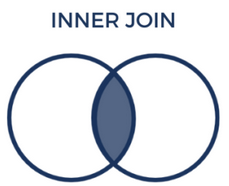

- left 병합: inner 병합에 left 데이터프레임에 짝이 없는 데이터 추가

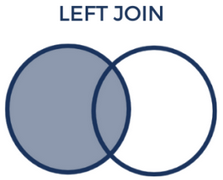

- right 병합: inner 병합에 right 데이터프레임에 짝이없는 데이터 추가

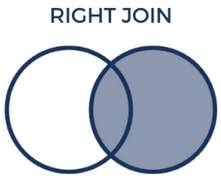

- outer 병합: inner  결과에 양쪽 데이터프레임에 짝이없는 데이터 추가

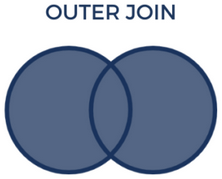

In [220]:
# 참고 : 좌우 데이터 프레임에 key가 되는 컬럼명이 다른 경우

data_B2 = pd.DataFrame({
    "EMP_ID": [3, 4, 5, 6, 7],
    "Description": ["Type C", "Type D", "Type E", "Type F", "Type G"],
    "Quantity": [30, 40, 50, 60, 70]
})

pd.merge(data_A, data_B2, left_on='ID', right_on='EMP_ID', how='inner').drop('EMP_ID', axis=1)

,ID,Name,Value,Description,Quantity
0,3,Charlie,300,Type C,30
1,4,David,400,Type D,40
2,5,Ella,500,Type E,50


### 연습
1. 어떤 식당의 1주, 2주차 영업자료인 `week_1_sales.csv`, `week_2_sales.csv`를 데이터프레임으로 읽기
2. 1주차, 2주차에 모두 식당에 방문한 고객을 찾기
3. 2항목에 해당하는 고객중 같은 음식을 먹은 고객 찾기
4. `customers.csv`, `foods.csv`를 이용하여 찾은 고객의 이름과 먹은 메뉴 이름 알아내기

In [221]:
# 1. 어떤 식당의 1주, 2주차 영업자료인 `week_1_sales.csv`, `week_2_sales.csv`를 데이터프레임으로 읽기

df1 = pd.read_csv("data/week_1_sales.csv",encoding="cp949")
df2 = pd.read_csv("data/week_2_sales.csv",encoding="cp949")

In [227]:
# 2. 1주차, 2주차에 모두 식당에 방문한 고객을 찾기

common_customers = pd.merge(df1,df2, on = "Customer ID", how = "inner", suffixes=("_df1","_df2"))
common_customers

,Customer ID,Food ID_df1,Food ID_df2
0,537,9,5
1,155,9,3
2,503,5,8
3,503,5,9
4,155,1,3
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


In [223]:
df2.head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


In [229]:
# 3. 2항목에 해당하는 고객중 같은 음식을 먹은 고객 찾기

common_customers[common_customers["Food ID_df1"] == common_customers["Food ID_df2"]]

,Customer ID,Food ID_df1,Food ID_df2
12,304,3,3
19,540,3,3
21,937,10,10
23,233,3,3
24,21,4,4
32,922,1,1
52,21,4,4
53,578,5,5
54,578,5,5


In [232]:
# 키를 복수로 두고도 할 수 있음
same_food_customers = common_customers.merge(common_customers,left_on=["Food ID_df1"], right_on=["Food ID_df2"])
same_food_customers

,Customer ID_x,Food ID_df1_x,Food ID_df2_x,Customer ID_y,Food ID_df1_y,Food ID_df2_y
0,537,9,5,503,5,9
1,537,9,5,574,10,9
2,155,9,3,503,5,9
3,155,9,3,574,10,9
4,503,5,8,537,9,5
...,...,...,...,...,...,...
364,343,3,7,304,2,3
365,343,3,7,479,6,3
366,343,3,7,321,1,3
367,621,9,6,503,5,9


In [148]:
# 4. `customers.csv`, `foods.csv`를 이용하여 찾은 고객의 이름과 먹은 메뉴 이름 알아내기



In [235]:
df1 = pd.read_csv('data/customers.csv',encoding = 'cp949')
df2 = pd.read_csv('data/foods.csv',encoding = 'cp949')

In [239]:
df1.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [238]:
df2.head()

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49


In [243]:
merged = pd.merge(df1,df2,left_on="ID",right_on = "Food ID")

In [245]:
merged.head()

,ID,First Name,Last Name,Gender,Company,Occupation,Food ID,Food Item,Price
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist,1,Sushi,3.99
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer,2,Burrito,9.99
2,3,Roger,Black,Male,Tagfeed,Account Executive,3,Taco,2.99
3,4,Steven,Evans,Male,Fatz,Registered Nurse,4,Quesadilla,4.25
4,5,Judy,Morrison,Female,Demivee,Legal Assistant,5,Pizza,2.49


In [247]:
result = merged[["First Name", "Last Name","Food Item", "Price"]]
result

,First Name,Last Name,Food Item,Price
0,Joseph,Perkins,Sushi,3.99
1,Jennifer,Alvarez,Burrito,9.99
2,Roger,Black,Taco,2.99
3,Steven,Evans,Quesadilla,4.25
4,Judy,Morrison,Pizza,2.49
5,Amanda,Howell,Pasta,13.99
6,Johnny,Reid,Steak,24.99
7,Frances,Adams,Salad,11.25
8,Gregory,Chapman,Donut,0.99
9,Steven,Ryan,Drink,1.75


In [251]:
merged[merged['Price']>=5][["First Name", "Last Name","Food Item", "Price"]]

,First Name,Last Name,Food Item,Price
1,Jennifer,Alvarez,Burrito,9.99
5,Amanda,Howell,Pasta,13.99
6,Johnny,Reid,Steak,24.99
7,Frances,Adams,Salad,11.25


In [252]:
result = result.sort_values(by = "First Name")
result

,First Name,Last Name,Food Item,Price
5,Amanda,Howell,Pasta,13.99
7,Frances,Adams,Salad,11.25
8,Gregory,Chapman,Donut,0.99
1,Jennifer,Alvarez,Burrito,9.99
6,Johnny,Reid,Steak,24.99
0,Joseph,Perkins,Sushi,3.99
4,Judy,Morrison,Pizza,2.49
2,Roger,Black,Taco,2.99
3,Steven,Evans,Quesadilla,4.25
9,Steven,Ryan,Drink,1.75
